In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine, load_diabetes
from sklearn.model_selection import train_test_split
import sys
sys.path.append('../../src') # Temporarily adding the src folder to the path
from DecisionTree import DecisionTreeClassifier, DecisionTreeRegressor, Node

## Classification example

### Loading Data

In [8]:
# initialize an instance of load_wine
wine = load_wine()

In [10]:
# Create data and target 
X = DataFrame(wine.data, columns=wine.feature_names)
y = DataFrame(wine.target, columns=['type'])

### Data exploration and visualization

This is not a complete exploration of the data as the goal of this exercise is to test that our code works. Nonetheless, it is a good practice to check that the data is loaded correctly and get an overview of the features. Feel free to expand this

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [9]:
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


#### Data Visualization

<Axes: ylabel='Count'>

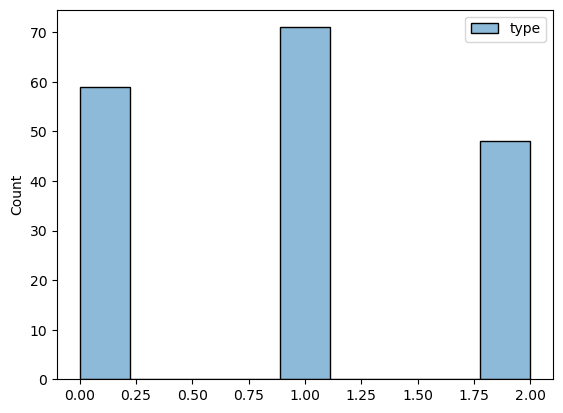

In [33]:
sns.histplot(y)

<Axes: >

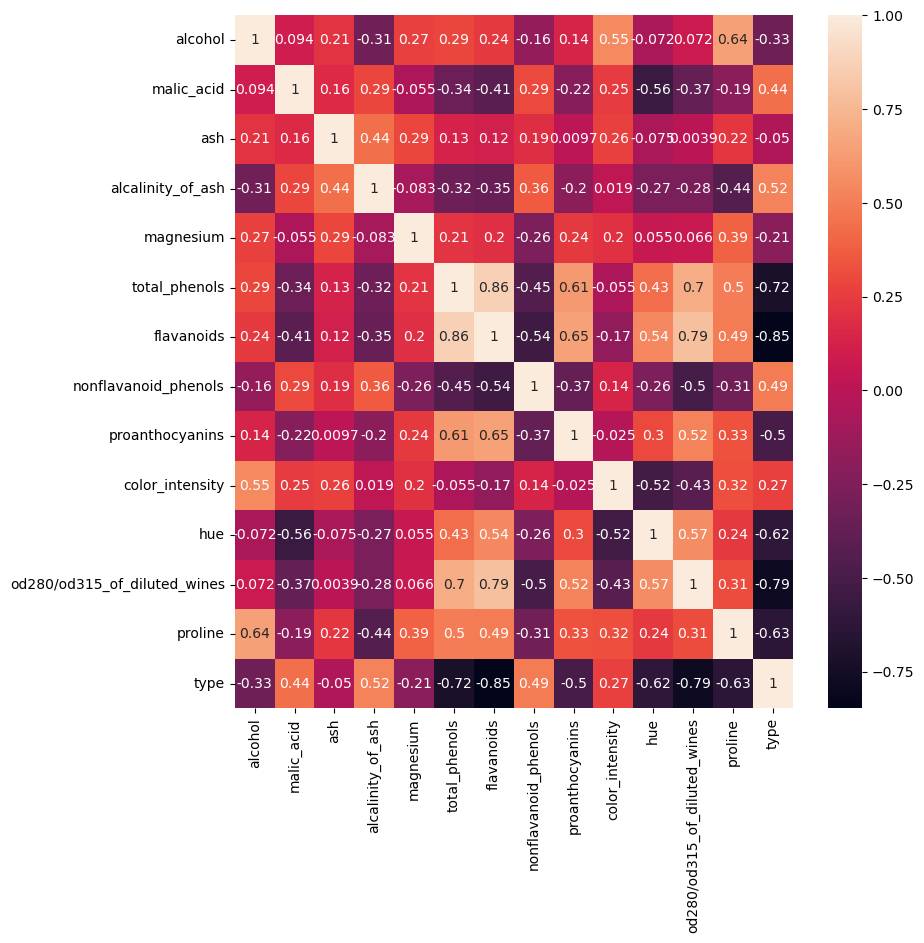

In [53]:
wine_df = X
wine_df['type'] = y
corrs = wine_df.corr()
plt.figure(figsize=(9,9))
sns.heatmap(corrs, annot=True)

### Apply Decision Tree

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [14]:
mytree = DecisionTreeClassifier()

In [16]:
mytree.fit(X_train, y_train)

In [92]:
mytree.root

In [18]:
y_pred = mytree.predict(X_test)

In [20]:
np.sum(y_pred == y_test.to_numpy().flatten())/len(y_pred)

0.9333333333333333

## Regression Example

In this section, we test the Decision Tree Regressor.

### Loading Data

In [11]:
diabetes = load_diabetes()

In [13]:
X = diabetes.data
y = diabetes.target

In [44]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [52]:
diabetes_df = DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df['progress'] = diabetes.target

<Axes: xlabel='progress', ylabel='Count'>

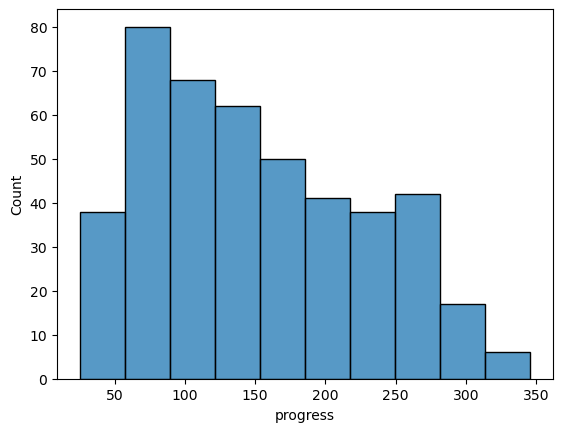

In [58]:
sns.histplot(diabetes_df, x='progress')

**Pair plots and correlation heat maps are a good way to look for any correlation in the data and between features**

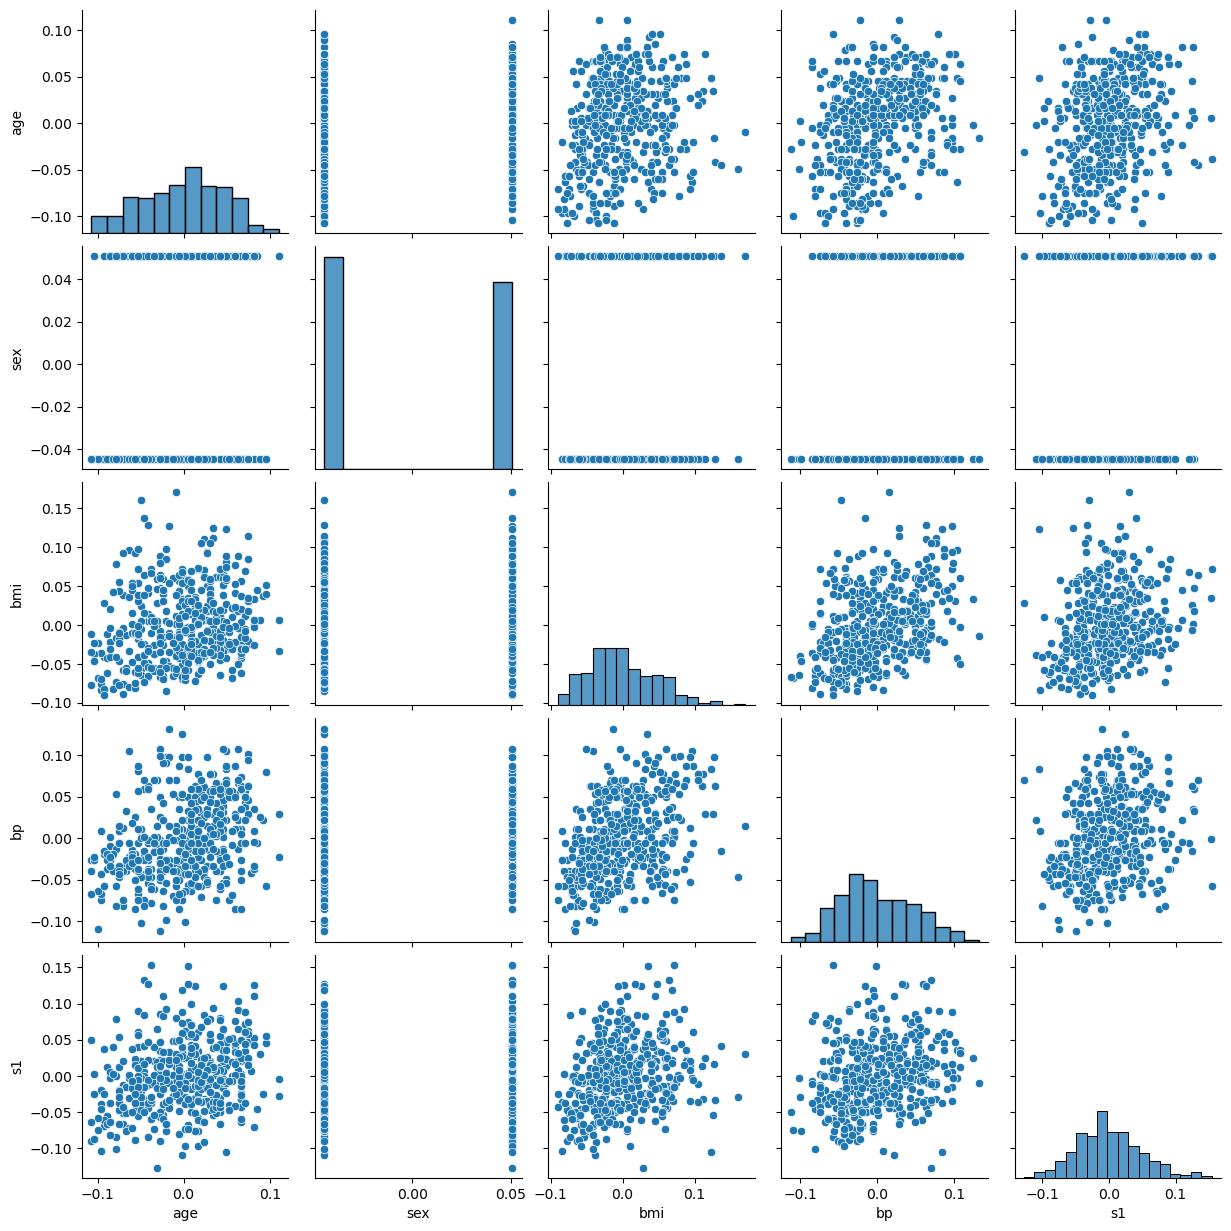

In [64]:
sns.pairplot(diabetes_df, vars=diabetes_df.columns[:5])

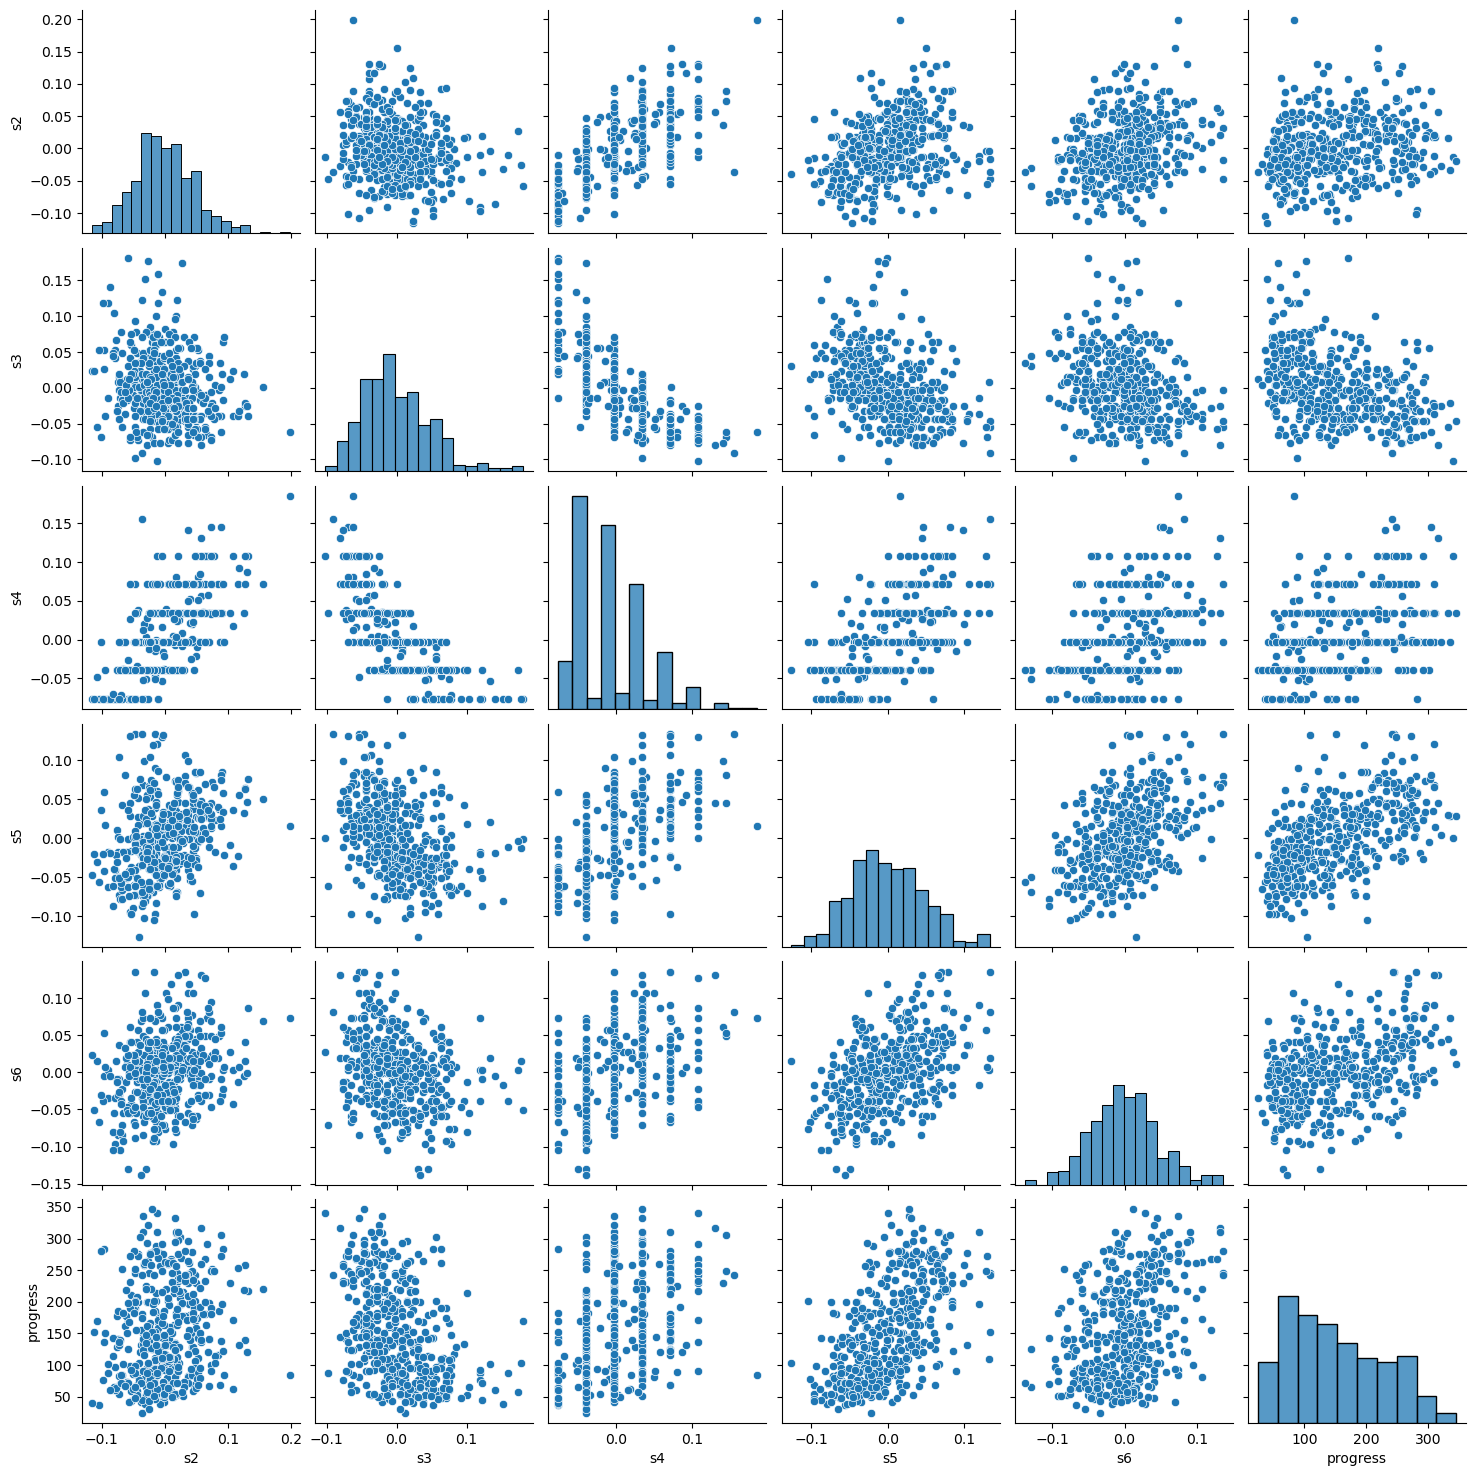

In [66]:
sns.pairplot(diabetes_df, vars=diabetes_df.columns[5:])

<Axes: >

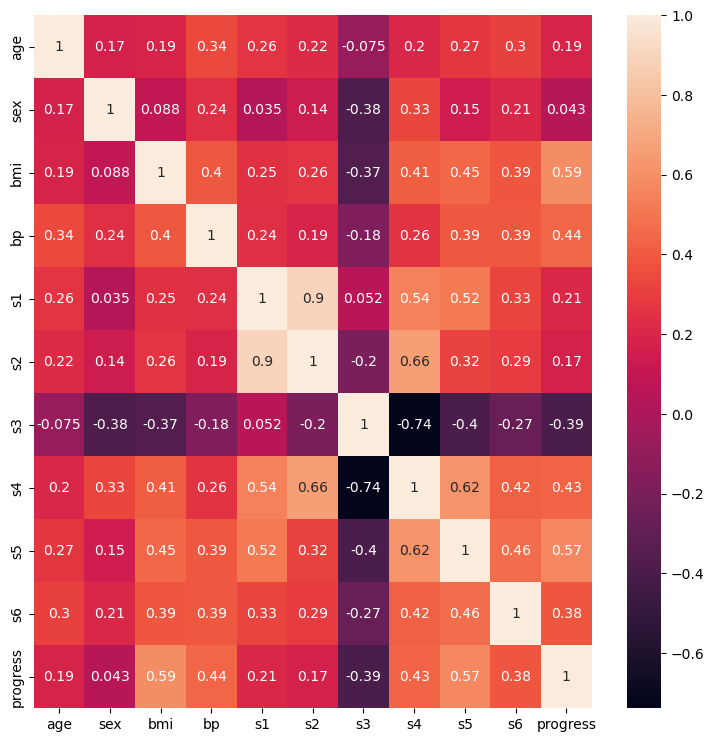

In [56]:
plt.figure(figsize=(9,9))
sns.heatmap(diabetes_df.corr(), annot=True)

### Apply Decision Tree

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [9]:
mytree = DecisionTreeRegressor()

In [11]:
mytree.fit(X_train, y_train)

In [13]:
y_pred = mytree.predict(X_test)

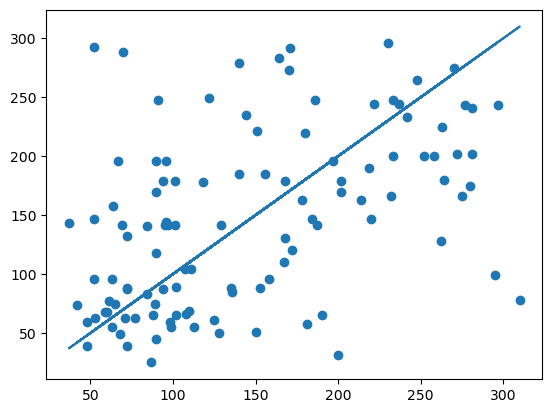

In [19]:
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test)

In [23]:
print(f" The mean squared error is {np.mean((y_pred-y_test)**2)}")

 The mean squared error is 5881.540540540541


### Compare to sklearn

In [9]:
import sklearn.tree as sktree
SKTR = sktree.DecisionTreeRegressor() 

In [17]:
SKTR.fit(X_train, y_train)

DecisionTreeRegressor()

In [19]:
sk_pred = SKTR.predict(X_test)

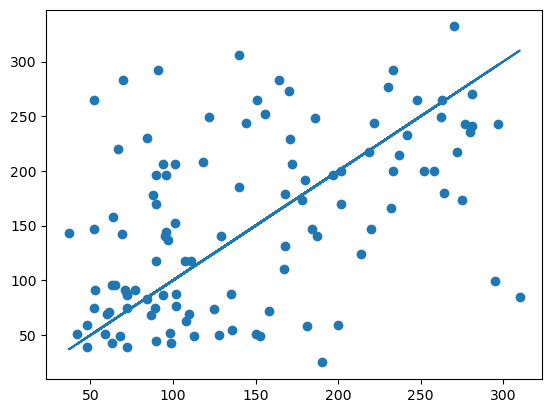

In [21]:
plt.scatter(y_test, sk_pred)
plt.plot(y_test, y_test)

In [23]:
print(f" The mean squared error is {np.mean((sk_pred-y_test)**2)}")

 The mean squared error is 6241.756756756757


**Appears that our Decision Tree is performing very well and close to sklearn's**